In [39]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [40]:
# Read file csv
df = pd.read_csv('DXG-Historical-Data.csv')
df.head()

,Unnamed: 0,Date,Price
0,0,2017-01-03,6066.50
1,1,2017-01-04,6166.40
2,2,2017-01-05,6091.50
3,3,2017-01-06,6141.40
4,4,2017-01-07,6116.45


In [41]:
df = df.reset_index()['Price']
df

0        6066.50
1        6166.40
2        6091.50
3        6141.40
4        6116.45
          ...   
2702    16800.00
2703    16850.00
2704    16850.00
2705    16800.00
2706    16770.00
Name: Price, Length: 2707, dtype: float64

In [42]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))
print(df.shape)

(2707, 1)


In [43]:
#Split train:test 7:3
train_size_7_3 = int(0.7 * len(df))
test_size_7_3 = len(df) - train_size_7_3

train_data_7_3 = df[:train_size_7_3]
test_data_7_3 = df[train_size_7_3:]

#Split train:test 8:2
train_size_8_2 = int(0.8 * len(df))
test_size_8_2 = len(df) - train_size_8_2

train_data_8_2 = df[:train_size_8_2]
test_data_8_2 = df[train_size_8_2:]

#Split train:test 9:1
train_size_9_1 = int(0.9 * len(df))
test_size_9_1 = len(df) - train_size_9_1

train_data_9_1 = df[:train_size_9_1]
test_data_9_1 = df[train_size_9_1:]

In [44]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [45]:
time_step = 100

x_train_7_3, y_train_7_3 = create_dataset(train_data_7_3, time_step)
x_test_7_3, y_test_7_3 = create_dataset(test_data_7_3, time_step)

x_train_8_2, y_train_8_2 = create_dataset(train_data_8_2, time_step)
x_test_8_2, y_test_8_2 = create_dataset(test_data_8_2, time_step)

x_train_9_1, y_train_9_1 = create_dataset(train_data_9_1, time_step)
x_test_9_1, y_test_9_1 = create_dataset(test_data_9_1, time_step)

In [46]:
x_train_7_3 = x_train_7_3.reshape(x_train_7_3.shape[0],x_train_7_3.shape[1] , 1)
x_test_7_3 = x_test_7_3.reshape(x_test_7_3.shape[0],x_test_7_3.shape[1] , 1)

In [47]:
x_train_8_2 = x_train_8_2.reshape(x_train_8_2.shape[0],x_train_8_2.shape[1] , 1)
x_test_8_2 = x_test_8_2.reshape(x_test_8_2.shape[0],x_test_8_2.shape[1] , 1)

In [48]:
x_train_9_1 = x_train_9_1.reshape(x_train_9_1.shape[0],x_train_9_1.shape[1] , 1)
x_test_9_1 = x_test_9_1.reshape(x_test_9_1.shape[0],x_test_9_1.shape[1] , 1)

In [49]:
def forecast_future_days(model, test_data, pred_days):
    x_input=test_data[-20:].reshape(1,-1)
    x_input.shape

    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()

    from numpy import array

    lstm_output=[]
    n_steps=x_input.shape[1]
    i=0
    while(i<pred_days):

        if(len(temp_input)>x_input.shape[1]):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lstm_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            print(len(temp_input))
            lstm_output.extend(yhat.tolist())
            i=i+1
    return lstm_output

## Model with ratio 7:3

In [50]:
# Build model
model_7_3 =Sequential()
model_7_3.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_7_3.add(LSTM(50,return_sequences=True))
model_7_3.add(LSTM(50))
model_7_3.add(Dense(1))
model_7_3.compile(loss='mean_squared_error',optimizer='adam')

In [51]:
# Fit model
model_7_3.fit(x_train_7_3, y_train_7_3, validation_data=(x_test_7_3, y_test_7_3), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
29/29 [==============================] - 7s 61ms/step - loss: 0.0103 - val_loss: 0.0019
Epoch 2/100
29/29 [==============================] - 1s 18ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 3/100
29/29 [==============================] - 1s 21ms/step - loss: 0.0018 - val_loss: 0.0029
Epoch 4/100
29/29 [==============================] - 1s 26ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 5/100
29/29 [==============================] - 1s 26ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 6/100
29/29 [==============================] - 1s 26ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 7/100
29/29 [==============================] - 1s 26ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 8/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 9/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 10/100
29/29 [==============================] - 1s 18ms/step - loss: 0.0017 - val_loss: 0.0013

In [52]:
# Predict
y_pred_7_3 = model_7_3.predict(x_test_7_3)
y_pred_7_3

23/23 [==============================] - 1s 9ms/step


array([[0.34921253],
       [0.3112257 ],
       [0.3039454 ],
       [0.3043228 ],
       [0.31844014],
       [0.32454565],
       [0.3091587 ],
       [0.30408204],
       [0.32339734],
       [0.33168402],
       [0.32295796],
       [0.3099406 ],
       [0.30936077],
       [0.31764078],
       [0.32014388],
       [0.31885132],
       [0.31611383],
       [0.30994228],
       [0.31258956],
       [0.33011535],
       [0.321176  ],
       [0.31922534],
       [0.3277032 ],
       [0.34241167],
       [0.33980313],
       [0.34521264],
       [0.3496631 ],
       [0.34645274],
       [0.34684134],
       [0.34562647],
       [0.3396269 ],
       [0.34929103],
       [0.35956222],
       [0.35807246],
       [0.35371754],
       [0.3531814 ],
       [0.35653597],
       [0.36559156],
       [0.38711643],
       [0.40072122],
       [0.40751347],
       [0.39144683],
       [0.39175263],
       [0.4337725 ],
       [0.43936062],
       [0.45446825],
       [0.45265502],
       [0.466

In [53]:
# Scaler inverse transform
y_pred_7_3 = scaler.inverse_transform(y_pred_7_3.reshape(-1,1))
y_pred_7_3

array([[20273.688 ],
       [18728.252 ],
       [18432.062 ],
       [18447.418 ],
       [19021.76  ],
       [19270.154 ],
       [18644.158 ],
       [18437.621 ],
       [19223.436 ],
       [19560.568 ],
       [19205.56  ],
       [18675.969 ],
       [18652.379 ],
       [18989.24  ],
       [19091.074 ],
       [19038.488 ],
       [18927.117 ],
       [18676.037 ],
       [18783.738 ],
       [19496.748 ],
       [19133.064 ],
       [19053.705 ],
       [19398.613 ],
       [19997.006 ],
       [19890.88  ],
       [20110.959 ],
       [20292.02  ],
       [20161.41  ],
       [20177.22  ],
       [20127.795 ],
       [19883.71  ],
       [20276.883 ],
       [20694.748 ],
       [20634.14  ],
       [20456.969 ],
       [20435.156 ],
       [20571.63  ],
       [20940.045 ],
       [21815.75  ],
       [22369.242 ],
       [22645.574 ],
       [21991.926 ],
       [22004.37  ],
       [23713.883 ],
       [23941.227 ],
       [24555.857 ],
       [24482.09  ],
       [25033

In [54]:
#Forecast 30 days
forecast_30days_7_3 = forecast_future_days(model_7_3, test_data_7_3, 30)
#Forecast 60 days
forecast_60days_7_3 = forecast_future_days(model_7_3, test_data_7_3, 60)
#Forecast 90 days
forecast_90days_7_3 = forecast_future_days(model_7_3, test_data_7_3, 90)

[0.26384497]
21
1 day input [0.27120331 0.27120331 0.27489031 0.27857731 0.27218651 0.27218651
 0.27857731 0.27489031 0.28103531 0.27857731 0.26137132 0.27489031
 0.27489031 0.25768432 0.26382932 0.26505832 0.26505832 0.26382932
 0.26309192 0.26384497]
1 day output [[0.26368022]]
2 day input [0.27120331 0.27489031 0.27857731 0.27218651 0.27218651 0.27857731
 0.27489031 0.28103531 0.27857731 0.26137132 0.27489031 0.27489031
 0.25768432 0.26382932 0.26505832 0.26505832 0.26382932 0.26309192
 0.26384497 0.26368022]
2 day output [[0.26337284]]
3 day input [0.27489031 0.27857731 0.27218651 0.27218651 0.27857731 0.27489031
 0.28103531 0.27857731 0.26137132 0.27489031 0.27489031 0.25768432
 0.26382932 0.26505832 0.26505832 0.26382932 0.26309192 0.26384497
 0.26368022 0.26337284]
3 day output [[0.2629655]]
4 day input [0.27857731 0.27218651 0.27218651 0.27857731 0.27489031 0.28103531
 0.27857731 0.26137132 0.27489031 0.27489031 0.25768432 0.26382932
 0.26505832 0.26505832 0.26382932 0.26309192

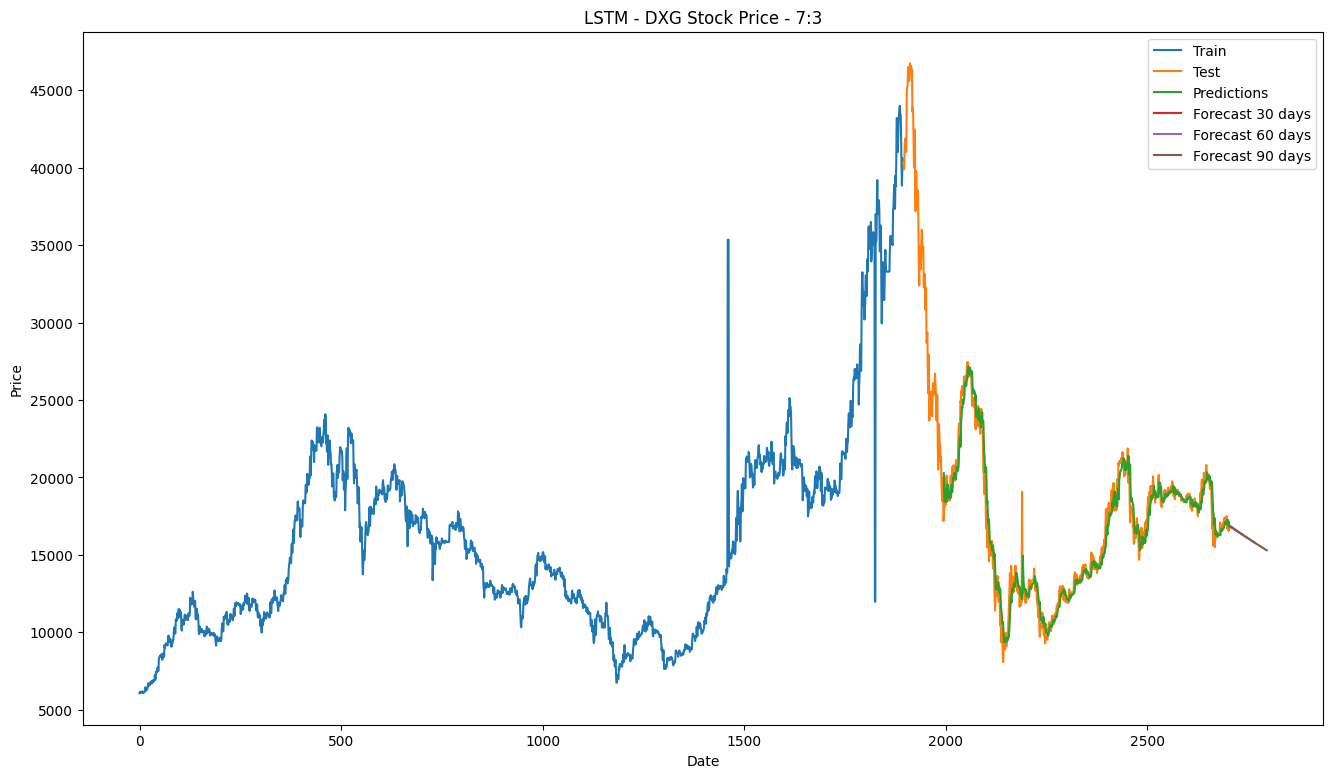

In [55]:
plt.figure(figsize =(16, 9))

train_data_index = pd.RangeIndex(start=0, stop=train_size_7_3, step=1)
plt.plot(scaler.inverse_transform(train_data_7_3))
test_data_index = pd.RangeIndex(start=train_size_7_3, stop=train_size_7_3+len(test_data_7_3), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_7_3))
predict_data_index = pd.RangeIndex(start=train_size_7_3 + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), step=1)
plt.plot(predict_data_index,y_pred_7_3)
forecast_data_30_index = pd.RangeIndex(start=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)) + len(forecast_30days_7_3), step=1)
plt.plot(forecast_data_30_index,scaler.inverse_transform(np.array(forecast_30days_7_3).reshape(-1,1)))
forecast_data_60_index = pd.RangeIndex(start=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)) + len(forecast_60days_7_3), step=1)
plt.plot(forecast_data_60_index,scaler.inverse_transform(np.array(forecast_60days_7_3).reshape(-1,1)))
forecast_data_90_index = pd.RangeIndex(start=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)) + len(forecast_90days_7_3), step=1)
plt.plot(forecast_data_90_index,scaler.inverse_transform(np.array(forecast_90days_7_3).reshape(-1,1)))

plt.title('LSTM - DXG Stock Price - 7:3')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predictions', 'Forecast 30 days', 'Forecast 60 days', 'Forecast 90 days'])
plt.show()

In [56]:
y_test_7_3 = y_test_7_3.reshape(-1,1)
y_test_7_3 = scaler.inverse_transform(y_test_7_3)

rmse = np.sqrt(mean_squared_error(y_test_7_3, y_pred_7_3))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_7_3, y_pred_7_3)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_7_3, y_pred_7_3)
print("MAPE:", mape)

RMSE: 741.6859254913775
MAE: 487.7340333860019
MAPE: 0.03098775424963864


## 8:2

In [57]:
model_8_2 =Sequential()
model_8_2.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_8_2.add(LSTM(50,return_sequences=True))
model_8_2.add(LSTM(50))
model_8_2.add(Dense(1))
model_8_2.compile(loss='mean_squared_error',optimizer='adam')

In [58]:
model_8_2.fit(x_train_8_2, y_train_8_2, validation_data=(x_test_8_2, y_test_8_2), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
33/33 [==============================] - 7s 64ms/step - loss: 0.0173 - val_loss: 0.0015
Epoch 2/100
33/33 [==============================] - 1s 17ms/step - loss: 0.0029 - val_loss: 8.4362e-04
Epoch 3/100
33/33 [==============================] - 1s 18ms/step - loss: 0.0026 - val_loss: 7.5972e-04
Epoch 4/100
33/33 [==============================] - 1s 17ms/step - loss: 0.0023 - val_loss: 8.9020e-04
Epoch 5/100
33/33 [==============================] - 1s 16ms/step - loss: 0.0021 - val_loss: 5.4127e-04
Epoch 6/100
33/33 [==============================] - 1s 15ms/step - loss: 0.0021 - val_loss: 5.2364e-04
Epoch 7/100
33/33 [==============================] - 1s 17ms/step - loss: 0.0019 - val_loss: 4.6022e-04
Epoch 8/100
33/33 [==============================] - 1s 15ms/step - loss: 0.0018 - val_loss: 6.6802e-04
Epoch 9/100
33/33 [==============================] - 1s 17ms/step - loss: 0.0021 - val_loss: 8.6884e-04
Epoch 10/100
33/33 [==============================] - 1s 16ms/step -

In [59]:
y_pred_8_2 = model_8_2.predict(x_test_8_2)
y_pred_8_2

14/14 [==============================] - 1s 9ms/step


array([[0.11601987],
       [0.11392033],
       [0.11233813],
       [0.11007755],
       [0.11374203],
       [0.11573176],
       [0.11923736],
       [0.122215  ],
       [0.12042472],
       [0.11930615],
       [0.12547396],
       [0.13137534],
       [0.13466543],
       [0.13656305],
       [0.1386072 ],
       [0.13777299],
       [0.13745143],
       [0.14941195],
       [0.15553129],
       [0.1613451 ],
       [0.15635556],
       [0.16045329],
       [0.16080783],
       [0.1611088 ],
       [0.16035666],
       [0.16461438],
       [0.16592407],
       [0.16706298],
       [0.15574962],
       [0.15982977],
       [0.16190042],
       [0.15367265],
       [0.15449159],
       [0.15078922],
       [0.14795433],
       [0.14730626],
       [0.1480664 ],
       [0.14827877],
       [0.14830005],
       [0.1457949 ],
       [0.14514562],
       [0.15199552],
       [0.15874526],
       [0.15415043],
       [0.15185459],
       [0.15508418],
       [0.1566396 ],
       [0.157

In [60]:
y_pred_8_2 = scaler.inverse_transform(y_pred_8_2.reshape(-1,1))
y_pred_8_2

array([[10786.595 ],
       [10701.179 ],
       [10636.809 ],
       [10544.84  ],
       [10693.924 ],
       [10774.873 ],
       [10917.492 ],
       [11038.634 ],
       [10965.8   ],
       [10920.292 ],
       [11171.22  ],
       [11411.31  ],
       [11545.161 ],
       [11622.362 ],
       [11705.526 ],
       [11671.588 ],
       [11658.505 ],
       [12145.102 ],
       [12394.058 ],
       [12630.584 ],
       [12427.592 ],
       [12594.302 ],
       [12608.726 ],
       [12620.97  ],
       [12590.37  ],
       [12763.59  ],
       [12816.872 ],
       [12863.207 ],
       [12402.94  ],
       [12568.935 ],
       [12653.176 ],
       [12318.441 ],
       [12351.759 ],
       [12201.133 ],
       [12085.8   ],
       [12059.435 ],
       [12090.36  ],
       [12099.    ],
       [12099.865 ],
       [11997.947 ],
       [11971.532 ],
       [12250.21  ],
       [12524.813 ],
       [12337.88  ],
       [12244.477 ],
       [12375.867 ],
       [12439.148 ],
       [12460

In [61]:
#Forecast 30 days
forecast_30days_8_2 = forecast_future_days(model_8_2, test_data_8_2, 30)
#Forecast 60 days
forecast_60days_8_2 = forecast_future_days(model_8_2, test_data_8_2, 60)
#Forecast 90 days
forecast_90days_8_2 = forecast_future_days(model_8_2, test_data_8_2, 90)

[0.26282525]
21
1 day input [0.27120331 0.27120331 0.27489031 0.27857731 0.27218651 0.27218651
 0.27857731 0.27489031 0.28103531 0.27857731 0.26137132 0.27489031
 0.27489031 0.25768432 0.26382932 0.26505832 0.26505832 0.26382932
 0.26309192 0.26282525]
1 day output [[0.2624377]]
2 day input [0.27120331 0.27489031 0.27857731 0.27218651 0.27218651 0.27857731
 0.27489031 0.28103531 0.27857731 0.26137132 0.27489031 0.27489031
 0.25768432 0.26382932 0.26505832 0.26505832 0.26382932 0.26309192
 0.26282525 0.2624377 ]
2 day output [[0.2619912]]
3 day input [0.27489031 0.27857731 0.27218651 0.27218651 0.27857731 0.27489031
 0.28103531 0.27857731 0.26137132 0.27489031 0.27489031 0.25768432
 0.26382932 0.26505832 0.26505832 0.26382932 0.26309192 0.26282525
 0.2624377  0.2619912 ]
3 day output [[0.2615157]]
4 day input [0.27857731 0.27218651 0.27218651 0.27857731 0.27489031 0.28103531
 0.27857731 0.26137132 0.27489031 0.27489031 0.25768432 0.26382932
 0.26505832 0.26505832 0.26382932 0.26309192 0

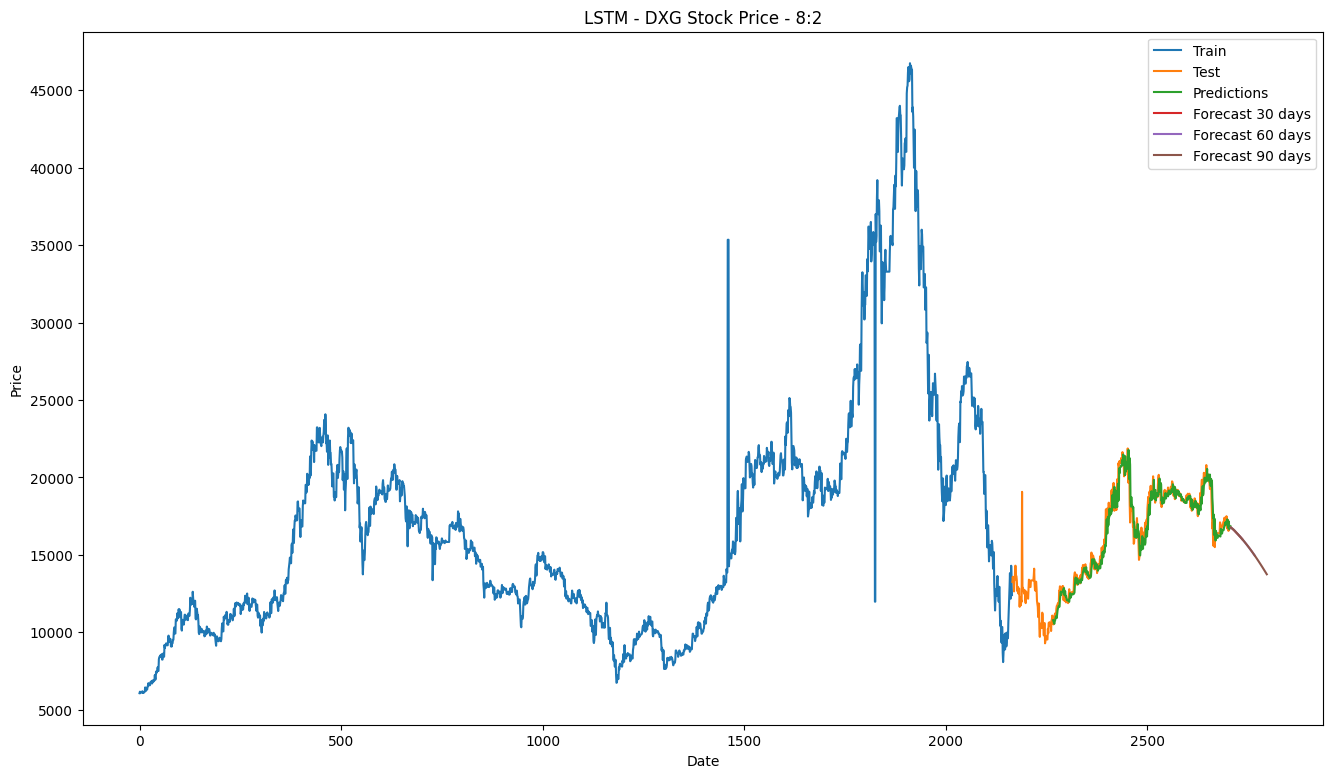

In [62]:
plt.figure(figsize =(16, 9))

train_data_index = pd.RangeIndex(start=0, stop=train_size_8_2, step=1)
plt.plot(scaler.inverse_transform(train_data_8_2))
test_data_index = pd.RangeIndex(start=train_size_8_2, stop=train_size_8_2+len(test_data_8_2), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_8_2))
predict_data_index = pd.RangeIndex(start=train_size_8_2 + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), step=1)
plt.plot(predict_data_index,y_pred_8_2)
forecast_data_30_index = pd.RangeIndex(start=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_30days_8_2), step=1)
plt.plot(forecast_data_30_index,scaler.inverse_transform(np.array(forecast_30days_8_2).reshape(-1,1)))
forecast_data_60_index = pd.RangeIndex(start=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_60days_8_2), step=1)
plt.plot(forecast_data_60_index,scaler.inverse_transform(np.array(forecast_60days_8_2).reshape(-1,1)))
forecast_data_90_index = pd.RangeIndex(start=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_90days_8_2), step=1)
plt.plot(forecast_data_90_index,scaler.inverse_transform(np.array(forecast_90days_8_2).reshape(-1,1)))

plt.title('LSTM - DXG Stock Price - 8:2')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predictions', 'Forecast 30 days', 'Forecast 60 days', 'Forecast 90 days'])
plt.show()

In [63]:
y_test_8_2 = y_test_8_2.reshape(-1,1)
y_test_8_2 = scaler.inverse_transform(y_test_8_2)

rmse = np.sqrt(mean_squared_error(y_test_8_2, y_pred_8_2))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_8_2, y_pred_8_2)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_8_2, y_pred_8_2)
print("MAPE:", mape)

RMSE: 513.037148469458
MAE: 360.6440935315098
MAPE: 0.021343572066865615


## 9:1

In [64]:
model_9_1 =Sequential()
model_9_1.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_9_1.add(LSTM(50,return_sequences=True))
model_9_1.add(LSTM(50))
model_9_1.add(Dense(1))
model_9_1.compile(loss='mean_squared_error',optimizer='adam')

In [65]:
model_9_1.fit(x_train_9_1, y_train_9_1, validation_data=(x_test_9_1, y_test_9_1), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
37/37 [==============================] - 7s 47ms/step - loss: 0.0131 - val_loss: 6.5378e-04
Epoch 2/100
37/37 [==============================] - 1s 18ms/step - loss: 0.0024 - val_loss: 7.0062e-04
Epoch 3/100
37/37 [==============================] - 1s 21ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 4/100
37/37 [==============================] - 1s 22ms/step - loss: 0.0020 - val_loss: 4.3104e-04
Epoch 5/100
37/37 [==============================] - 1s 22ms/step - loss: 0.0019 - val_loss: 4.2377e-04
Epoch 6/100
37/37 [==============================] - 1s 17ms/step - loss: 0.0020 - val_loss: 5.4680e-04
Epoch 7/100
37/37 [==============================] - 1s 15ms/step - loss: 0.0018 - val_loss: 3.5546e-04
Epoch 8/100
37/37 [==============================] - 1s 15ms/step - loss: 0.0017 - val_loss: 4.1344e-04
Epoch 9/100
37/37 [==============================] - 1s 15ms/step - loss: 0.0017 - val_loss: 3.5727e-04
Epoch 10/100
37/37 [==============================] - 1s 15ms/step -

In [66]:
y_pred_9_1 = model_9_1.predict(x_test_9_1)
y_pred_9_1

6/6 [==============================] - 1s 9ms/step


array([[0.28724402],
       [0.28926674],
       [0.29584277],
       [0.28815967],
       [0.28803763],
       [0.2941388 ],
       [0.29970136],
       [0.3034162 ],
       [0.30453777],
       [0.296029  ],
       [0.30125874],
       [0.30146247],
       [0.3014589 ],
       [0.30443367],
       [0.30004793],
       [0.303261  ],
       [0.30917507],
       [0.3028199 ],
       [0.3033548 ],
       [0.3063445 ],
       [0.30304837],
       [0.30532843],
       [0.30630514],
       [0.3102401 ],
       [0.3059118 ],
       [0.30645368],
       [0.31809893],
       [0.3160915 ],
       [0.31216124],
       [0.3082206 ],
       [0.3000251 ],
       [0.31306404],
       [0.3116527 ],
       [0.29468954],
       [0.30444154],
       [0.30261552],
       [0.30704707],
       [0.301452  ],
       [0.30161688],
       [0.3018388 ],
       [0.3070368 ],
       [0.3024869 ],
       [0.30081725],
       [0.29918677],
       [0.30227372],
       [0.3022502 ],
       [0.30196154],
       [0.297

In [67]:
y_pred_9_1 = scaler.inverse_transform(y_pred_9_1.reshape(-1,1))
y_pred_9_1

array([[17752.592 ],
       [17834.883 ],
       [18102.42  ],
       [17789.844 ],
       [17784.879 ],
       [18033.096 ],
       [18259.4   ],
       [18410.533 ],
       [18456.162 ],
       [18109.996 ],
       [18322.76  ],
       [18331.049 ],
       [18330.904 ],
       [18451.928 ],
       [18273.5   ],
       [18404.22  ],
       [18644.824 ],
       [18386.273 ],
       [18408.035 ],
       [18529.668 ],
       [18395.568 ],
       [18488.33  ],
       [18528.066 ],
       [18688.152 ],
       [18512.064 ],
       [18534.11  ],
       [19007.879 ],
       [18926.209 ],
       [18766.312 ],
       [18605.992 ],
       [18272.572 ],
       [18803.041 ],
       [18745.623 ],
       [18055.502 ],
       [18452.248 ],
       [18377.959 ],
       [18558.25  ],
       [18330.623 ],
       [18337.33  ],
       [18346.36  ],
       [18557.832 ],
       [18372.727 ],
       [18304.799 ],
       [18238.465 ],
       [18364.053 ],
       [18363.098 ],
       [18351.354 ],
       [18168

In [68]:
#Forecast 30 days
forecast_30days_9_1 = forecast_future_days(model_9_1, test_data_9_1, 30)
#Forecast 60 days
forecast_60days_9_1 = forecast_future_days(model_9_1, test_data_9_1, 60)
#Forecast 90 days
forecast_90days_9_1 = forecast_future_days(model_9_1, test_data_9_1, 90)

[0.24946034]
21
1 day input [0.27120331 0.27120331 0.27489031 0.27857731 0.27218651 0.27218651
 0.27857731 0.27489031 0.28103531 0.27857731 0.26137132 0.27489031
 0.27489031 0.25768432 0.26382932 0.26505832 0.26505832 0.26382932
 0.26309192 0.24946034]
1 day output [[0.23957467]]
2 day input [0.27120331 0.27489031 0.27857731 0.27218651 0.27218651 0.27857731
 0.27489031 0.28103531 0.27857731 0.26137132 0.27489031 0.27489031
 0.25768432 0.26382932 0.26505832 0.26505832 0.26382932 0.26309192
 0.24946034 0.23957467]
2 day output [[0.23180062]]
3 day input [0.27489031 0.27857731 0.27218651 0.27218651 0.27857731 0.27489031
 0.28103531 0.27857731 0.26137132 0.27489031 0.27489031 0.25768432
 0.26382932 0.26505832 0.26505832 0.26382932 0.26309192 0.24946034
 0.23957467 0.23180062]
3 day output [[0.22561318]]
4 day input [0.27857731 0.27218651 0.27218651 0.27857731 0.27489031 0.28103531
 0.27857731 0.26137132 0.27489031 0.27489031 0.25768432 0.26382932
 0.26505832 0.26505832 0.26382932 0.2630919

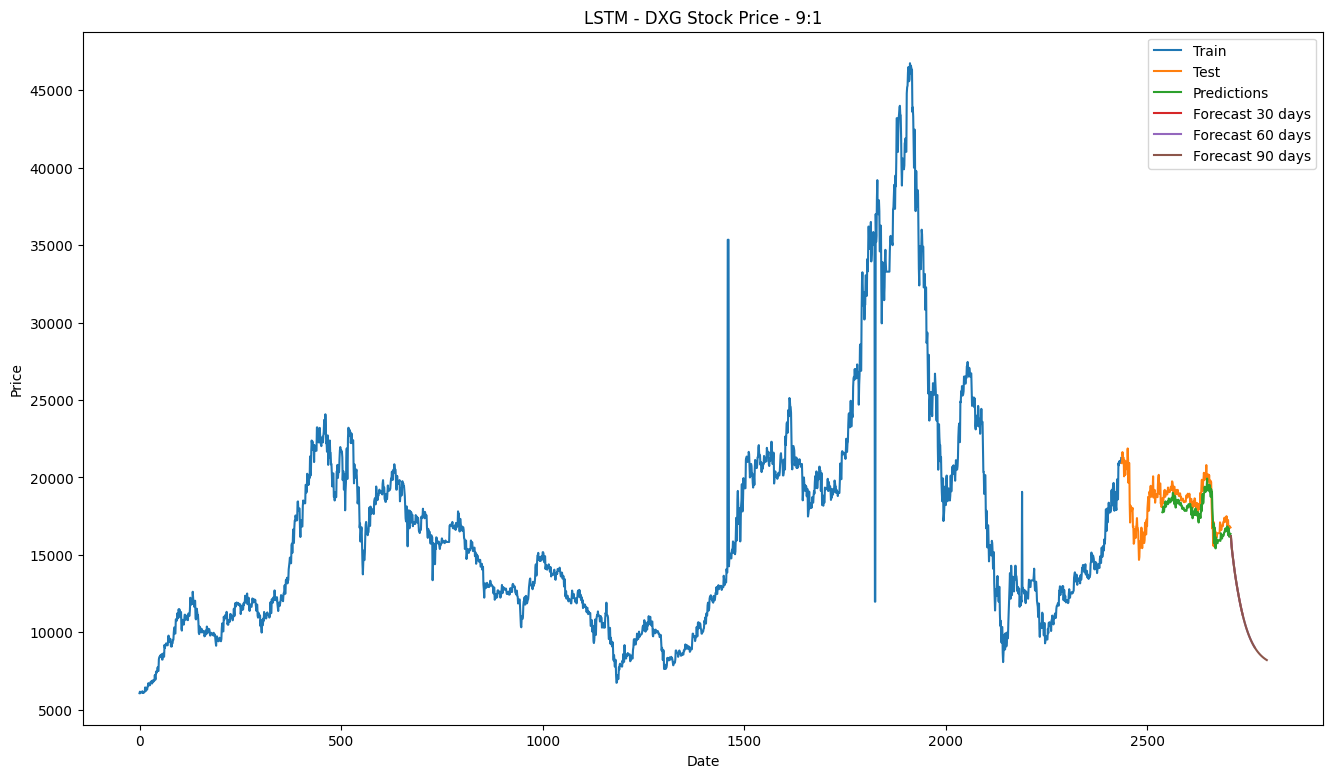

In [69]:
plt.figure(figsize =(16, 9))

train_data_index = pd.RangeIndex(start=0, stop=train_size_9_1, step=1)
plt.plot(scaler.inverse_transform(train_data_9_1))
test_data_index = pd.RangeIndex(start=train_size_9_1, stop=train_size_9_1+len(test_data_9_1), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_9_1))
predict_data_index = pd.RangeIndex(start=train_size_9_1 + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), step=1)
plt.plot(predict_data_index,y_pred_9_1)
forecast_data_30_index = pd.RangeIndex(start=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)) + len(forecast_30days_9_1), step=1)
plt.plot(forecast_data_30_index,scaler.inverse_transform(np.array(forecast_30days_9_1).reshape(-1,1)))
forecast_data_60_index = pd.RangeIndex(start=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)) + len(forecast_60days_9_1), step=1)
plt.plot(forecast_data_60_index,scaler.inverse_transform(np.array(forecast_60days_9_1).reshape(-1,1)))
forecast_data_90_index = pd.RangeIndex(start=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)) + len(forecast_90days_9_1), step=1)
plt.plot(forecast_data_90_index,scaler.inverse_transform(np.array(forecast_90days_9_1).reshape(-1,1)))

plt.title('LSTM - DXG Stock Price - 9:1')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predictions', 'Forecast 30 days', 'Forecast 60 days', 'Forecast 90 days'])
plt.show()

In [70]:
y_test_9_1 = y_test_9_1.reshape(-1,1)
y_test_9_1 = scaler.inverse_transform(y_test_9_1)

rmse = np.sqrt(mean_squared_error(y_test_9_1, y_pred_9_1))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_9_1, y_pred_9_1)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_9_1, y_pred_9_1)
print("MAPE:", mape)

RMSE: 700.902212129694
MAE: 636.4490138633578
MAPE: 0.03453579831536045
